<a href="https://colab.research.google.com/github/Khushibung05/logistic_regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###import required libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

###example dataset

In [12]:
x=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]) #study hours
y=np.array([0,0,0,0,1,1,1,1,1,1]) # 0=fail , 1=pass

###train-test-split,standardization

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


###logistic regression model

In [32]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

###preditctions

In [33]:
y_pred=model.predict(x_test)
print("Predictions:",y_pred)

Predictions: [1 0]


####since the model predict only 1/0 i.e., pass/fail

###Model accuracy

In [34]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


####1.0 means 100% accurate

#classification report
####precision , Recall , f1-score

In [35]:
print("\nclassification Report:\n",classification_report(y_test,y_pred))


classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



###visualisation

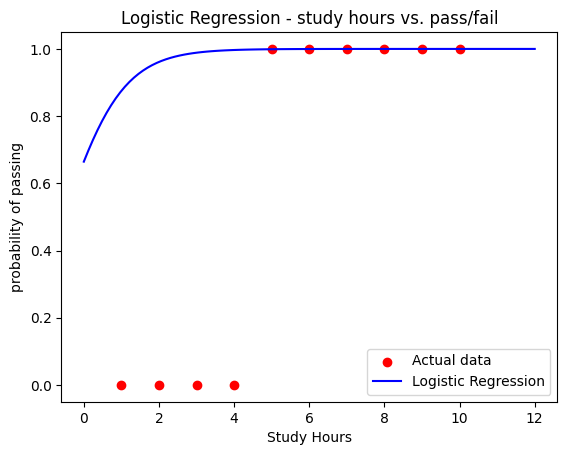

In [36]:
x_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(x_range)[:,1]
#plot
plt.scatter(x,y,color='red',label='Actual data')#scatter plot dots
plt.plot(x_range,y_prob,color='blue',label='Logistic Regression')#curve
plt.xlabel('Study Hours')
plt.ylabel('probability of passing')
plt.title('Logistic Regression - study hours vs. pass/fail')
plt.legend()
plt.show()

###confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[1 0]
 [0 1]]


[[TN FP][FN TP]]

####-TN(TRUE NEGATIVE)->CORRECTLY PREDICTED NO
####-FP->PREDICTED YES , BUT ACTUALLY NO
####-FN->PREDICTED NO , BUT ACTUALLY YES
####-TP->CORRECTLY PREDICTED YES

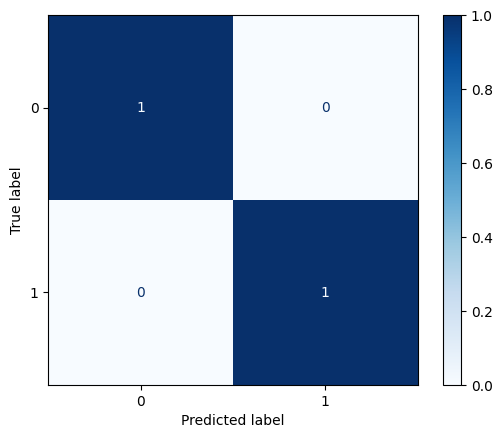

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,cmap="Blues")
plt.show()


#**heart disease**

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/heart.csv'

# Importing the dataset
df= pd.read_csv(path)

Mounted at /content/drive


###preprocessig

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


###visualising target

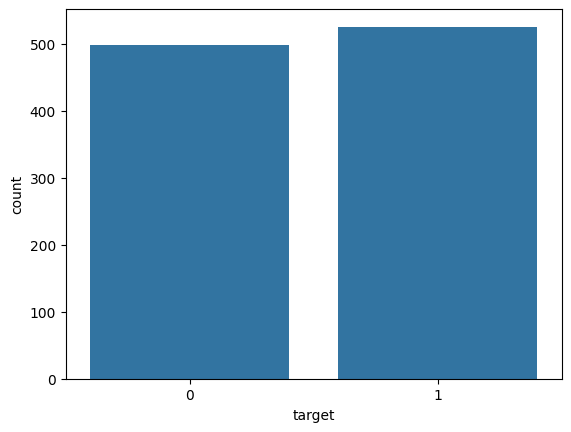

In [47]:
#countplot
import seaborn as sns
sns.countplot(x='target',data=df)
plt.show()


###train-test-split, standardization


In [57]:
#defining x and y variables(independent and target)
x=df.drop("target",axis=1)
y=df["target"]

#train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#standardization
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

###logistic reg

In [58]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred=model.predict(x_test)
print("Predictions:",y_pred)


Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [60]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [61]:
print("\nclassification Report:\n",classification_report(y_test,y_pred))


classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



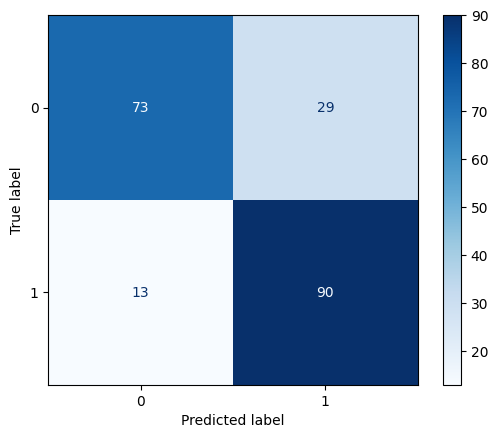

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,cmap="Blues")
plt.show()


####tn->73 , tp->90 means 90 ppl has heart disease and 73 donot have

#**telco-sutomer-churn**

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/telco_customer/telco_customer_churn.csv'

# Importing the dataset
df= pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [95]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [97]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Common churn-related features:

tenure

monthly_charges

total_charges

contract_type

payment_method

internet_service

###Target variable:

Churn (Yes / No)

In [130]:
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes=1, No=0

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)


X = df.drop('Churn', axis=1)
y = df['Churn']
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#logistic
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap="Blues"
)

plt.show()





/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 13 features, but LogisticRegression is expecting 13601 features as input.

In [131]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # probability of churn
print("Predictions:", y_pred)
print("Probabilities of Churn:", y_prob)


Predictions: [1 0 0 ... 0 0 0]
Probabilities of Churn: [6.59202764e-01 5.95526146e-02 5.77825369e-04 ... 1.92357415e-02
 4.02150806e-03 3.91996782e-01]


###Classification:

1 → Likely to churn

0 → Likely to stay

In [120]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8090844570617459


In [128]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)




[[917 119]
 [150 223]]


[[TN FP]
 [FN TP]]
TP → churn customers correctly identified

TN → non-churn customers correctly identified

FP → non-churn misclassified as churn

FN → churn customers missed

In [122]:
print("\nclassification Report:\n",classification_report(y_test,y_pred))


classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.65      0.60      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409

